## Solving and plotting 2D dynamical systems

### Example: $\dot{x} = y$, $\dot{y} = -x$

In [1]:
# importing the needed python libraries
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
from scipy.integrate import solve_ivp  # used in numerical integration

In [2]:
def simulate(n_timesteps: int, state0: list=[1.0, 0.0], h: float=0.02) -> Tuple[np.ndarray, np.ndarray]:

    def diff(t, state):
        x, y = state 
        return y, -x # dx/dt = y, dy/dt = -x

    t = np.arange(0, n_timesteps * h, h)
    
    sol = solve_ivp(diff, 
                    y0=state0, 
                    t_span=(0.0, n_timesteps*h),
                    dense_output=True)
    
    return sol.sol(t).T, t

### Trajectories starting from to different initial states

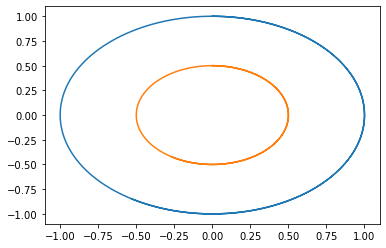

In [3]:
data1, data_t = simulate(500, state0=[0,1], h= 0.02)
data2, data_t = simulate(500, state0=[0,0.5], h= 0.02)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data1[:, 0], data1[:, 1])
ax.plot(data2[:, 0], data2[:, 1])

### Add the vector field

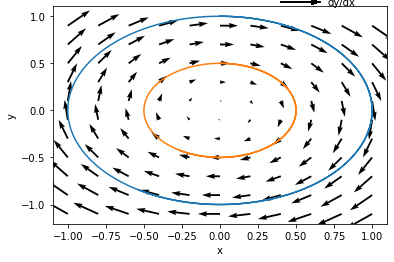

In [4]:
x, y = np.meshgrid(np.arange(-1.,1.1, 0.2), np.arange(-1.1,1.1, 0.2))
U = y
V = -x

# plotting the slope field
fig, ax = plt.subplots()
q = ax.quiver(x, y, U, V, angles='xy')
ax.quiverkey(q, X=0.8, Y=1.02, U=2,
             label='dy/dx', labelpos='E')

# plotting the simulated trajectories
ax.plot(data1[:, 0], data1[:, 1])
ax.plot(data2[:, 0], data2[:, 1])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()